<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM

**Membuat Gamma Correction**

Gamma Correction pada citra 
-----------------------------
Masukkan nilai Gamma: 3


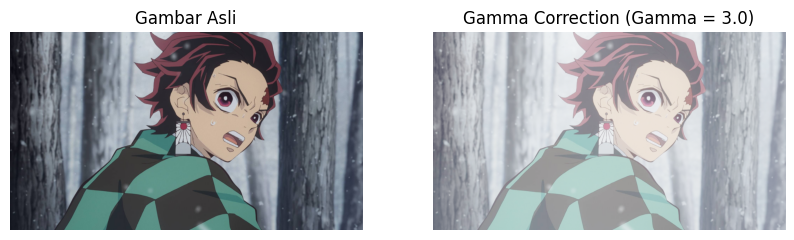

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Potongan Kode dari Modul ---
print('Gamma Correction pada citra ')
print('-----------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: ')) # Menggunakan float untuk menerima nilai desimal
except ValueError:
    print('Error, not a number')
# ------------------------------------

# Langkah 1: Membaca gambar
try:
    img = cv2.imread('gambar1.tiff')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Konversi ke RGB untuk plotting
except:
    print("Gambar tidak ditemukan. Pastikan path gambar benar.")
    exit()

# Langkah 2: Membuat tabel lookup (look-up table) untuk efisiensi

inv_gamma = 1.0 / gamma
table = np.array([((i / 255.0) ** inv_gamma) * 255
                  for i in np.arange(0, 256)]).astype("uint8")

# Langkah 3: Terapkan gamma correction menggunakan tabel lookup
gamma_corrected_img = cv2.LUT(img, table)

# Langkah 4: Tampilkan gambar asli dan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected_img)
plt.title(f'Gamma Correction (Gamma = {gamma})')
plt.axis('off')

plt.show()

**Simulasi Image Depth**

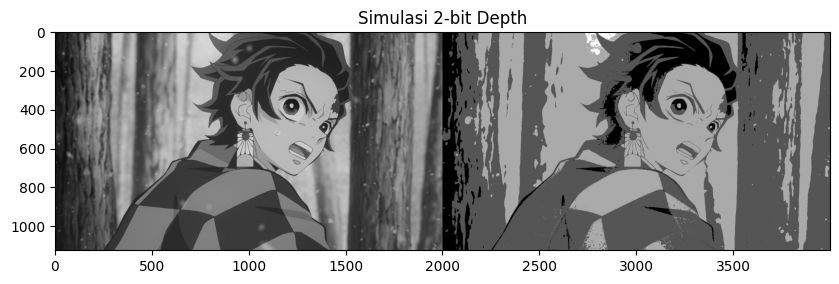

In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

# Langkah 1: Tentukan bit depth yang diinginkan
bit_depth = 2

# Langkah 2: Hitung level kuantisasi
level = 255 / (math.pow(2, bit_depth) - 1)

# Langkah 3: Baca gambar dalam mode grayscale
try:
    original = cv2.imread('gambar1.tiff', cv2.IMREAD_GRAYSCALE)
except:
    print("Gambar 'gambar1.tiff' tidak ditemukan.")
    exit()

# Langkah 4: Siapkan citra keluaran
# np.zeros_like(original) lebih ringkas
depth_image = np.zeros_like(original)

# Langkah 5: Terapkan rumus kuantisasi untuk setiap piksel
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        # Rumus C' = round((C / level)) * level
        new_value = round(original[i, j] / level) * level
        depth_image[i, j] = new_value

# Langkah 6: Tampilkan gambar asli dan hasil
plt.figure(figsize=(10, 5))
# np.hstack menggabungkan dua gambar secara horizontal
combined_image = np.hstack((original, depth_image))
plt.imshow(combined_image, cmap='gray')
plt.title(f'Simulasi {bit_depth}-bit Depth')
plt.show()

**Average Denoising**

In [1]:
import cv2
import numpy as np
import glob
import math
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR sesuai modul
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# Tentukan base path untuk mempermudah
base_path = "/content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/"

# Langkah 1: Baca citra asli
try:
    original_img_path = base_path + "galaxy.jpg"
    original_img = cv2.imread(original_img_path)
    if original_img is None:
        raise FileNotFoundError(f"File tidak ditemukan di: {original_img_path}")
except FileNotFoundError as e:
    print(e)
    exit()

# Gunakan glob untuk membaca semua gambar di folder 'noises'
noisy_images_path = base_path + "noises/*.jpg"
print(f"Mencari gambar bernoise di: {noisy_images_path}")
image_files = glob.glob(noisy_images_path)

if not image_files:
    print("Tidak ada gambar bernoise yang ditemukan.")
    exit()
else:
    print(f"Ditemukan {len(image_files)} gambar bernoise.")

# [cite_start]Memuat gambar menggunakan loop for sesuai permintaan [cite: 174, 175, 176, 177]
cv_img = []
for img_path in image_files:
    n = cv.imread(img_path)
    if n is not None:
        cv_img.append(n)
# -----------------------------------------------

# Langkah 2: Lakukan averaging dan hitung PSNR
num_images_to_average = [5, 10, 20, 40, 80, 100]
psnr_results = []
image_results = {}

print("\nMemproses average denoising...")

for count in num_images_to_average:
    if len(cv_img) < count:
        print(f"Tidak cukup gambar untuk di-average (butuh {count}, tersedia {len(cv_img)}). Berhenti.")
        break

    images_to_process = cv_img[:count]
    sum_of_images = np.zeros(images_to_process[0].shape, dtype=np.float64)
    for img in images_to_process:
        sum_of_images += img.astype(np.float64)

    averaged_image = (sum_of_images / count).astype(np.uint8)
    image_results[count] = averaged_image
    psnr = calculate_psnr(original_img, averaged_image)
    psnr_results.append((count, psnr))
    print(f"Jumlah Citra: {count}, Nilai PSNR: {psnr:.2f} dB")

# Langkah 3: Catat hasil pada tabel konsol
print("\n--- Hasil PSNR ---")
print("| No | Jumlah Citra | Nilai PSNR (dB) |")
print("|----|--------------|-----------------|")
for i, (count, psnr) in enumerate(psnr_results):
    print(f"| {i+1}. | {count:<12} | {psnr:.4f}          |")

# Menampilkan gambar hasil menggunakan Matplotlib
if image_results:
    print("\nMenampilkan gambar hasil... Tutup jendela gambar untuk keluar.")
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Perbandingan Hasil Average Denoising', fontsize=16)
    axes[0, 0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0, 0].set_title('Gambar Asli')
    axes[0, 0].axis('off')
    key_counts = [5, 20, 50, 100]
    plot_positions = [(0, 1), (0, 2), (1, 0), (1, 1)]
    for (count, pos) in zip(key_counts, plot_positions):
        if count in image_results:
            img_to_show = image_results[count]
            axes[pos].imshow(cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB))
            axes[pos].set_title(f'Average {count} Citra')
            axes[pos].axis('off')
    axes[1, 2].axis('off')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

File tidak ditemukan di: /content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/galaxy.jpg
Mencari gambar bernoise di: /content/drive/MyDrive/Polinema/Kuliah/PCVK/Images/noises/*.jpg
Tidak ada gambar bernoise yang ditemukan.

Memproses average denoising...
Tidak cukup gambar untuk di-average (butuh 5, tersedia 0). Berhenti.

--- Hasil PSNR ---
| No | Jumlah Citra | Nilai PSNR (dB) |
|----|--------------|-----------------|


**Image Masking**

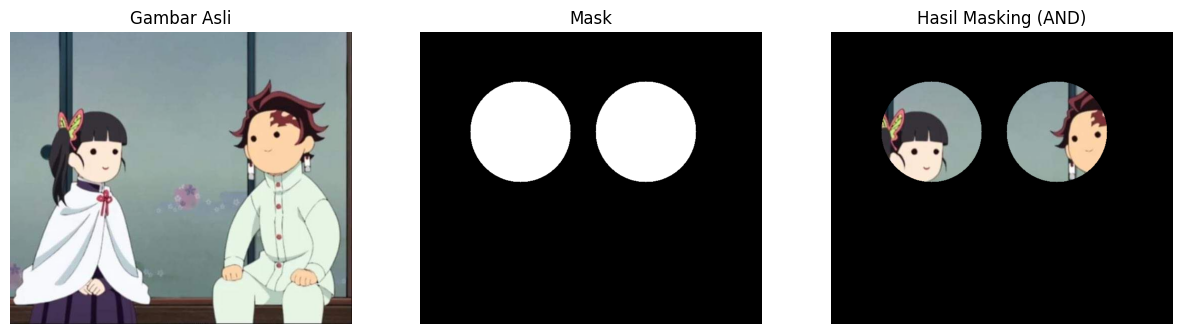

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Langkah 1: Baca gambar asli
try:
    img_couple = cv2.imread('couple.tiff')
    img_couple = cv2.cvtColor(img_couple, cv2.COLOR_BGR2RGB)
except:
    print("Gambar 'couple.tiff' tidak ditemukan.")
    exit()

# Langkah 2: Buat gambar mask hitam seukuran gambar asli
mask = np.zeros(img_couple.shape[:2], dtype="uint8")

# Langkah 3: Gambar dua lingkaran putih pada mask
# Koordinat (x, y) dan radius (r) ini adalah perkiraan dari contoh gambar
# Lingkaran 1
cv2.circle(mask, (200, 200), 100, 255, -1) # (center_x, center_y), radius, color, thickness (-1 for filled)
# Lingkaran 2
cv2.circle(mask, (450, 200), 100, 255, -1)

# Langkah 4: Terapkan mask ke gambar asli menggunakan bitwise_and
masked_img = cv2.bitwise_and(img_couple, img_couple, mask=mask)

# Langkah 5: Tampilkan hasilnya
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_couple)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(masked_img)
plt.title('Hasil Masking (AND)')
plt.axis('off')

plt.show()

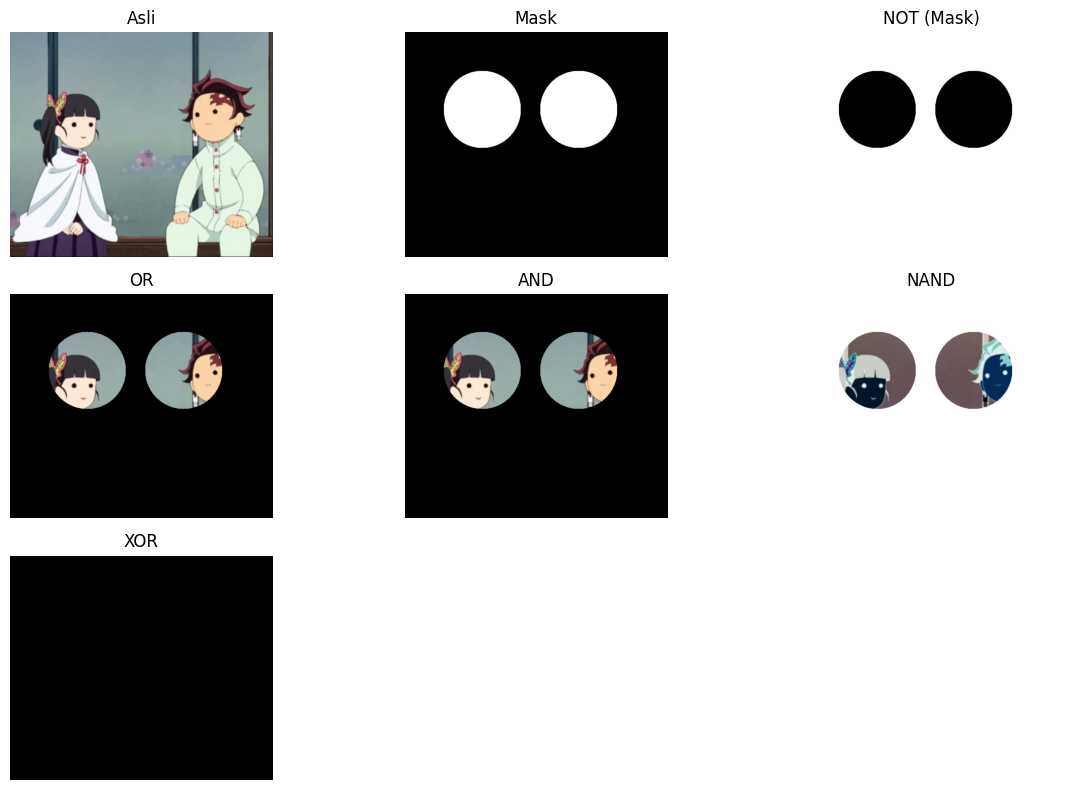

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gunakan gambar dan mask dari Tugas 4

# Operasi NOT (Komplemen)
not_mask = cv2.bitwise_not(mask)
not_image = cv2.bitwise_not(img_couple)

# Operasi OR
or_result = cv2.bitwise_or(img_couple, img_couple, mask=mask) # Contoh OR dengan mask

# Operasi AND (sudah dilakukan di Tugas 4)
and_result = cv2.bitwise_and(img_couple, img_couple, mask=mask)

# Operasi NAND (NOT AND)
nand_result = cv2.bitwise_not(and_result)

# Operasi XOR
xor_result = cv2.bitwise_xor(img_couple, img_couple, mask=mask) # Contoh XOR dengan mask

# Menampilkan semua hasil
titles = ['Asli', 'Mask', 'NOT (Mask)', 'OR', 'AND', 'NAND', 'XOR']
images = [img_couple, mask, not_mask, or_result, and_result, nand_result, xor_result]

plt.figure(figsize=(12, 8))
for i in range(7):
    plt.subplot(3, 3, i + 1)
    # Tampilkan gambar mask dalam grayscale
    if titles[i] in ['Mask', 'NOT (Mask)']:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()